<a href="https://colab.research.google.com/github/Abhinavthirumalaiswamy/Resource-Management/blob/main/You_tube_ad_revenue_prediction_Mini_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# You tube ad revenue prediction

In [ ]:
# Data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_csv('/content/youtube_ad_revenue_dataset.csv')
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.21418,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.74744,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.65850,26.200634,240534,Education,TV,CA,360.134007
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.51777,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.66643,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,50:41.0,9853,1673.0,147.0,42075.70489,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,50:41.0,10128,1709.0,63.0,57563.70304,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,50:41.0,10267,700.0,NaN,27549.71466,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,50:41.0,10240,1616.0,106.0,56967.38438,7.753099,585138,Music,Mobile,UK,351.525811


In [ ]:
column_names = ['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']
df = pd.read_csv('/content/youtube_ad_revenue_dataset.csv')
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.21418,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.74744,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.65850,26.200634,240534,Education,TV,CA,360.134007
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.51777,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.66643,6.635854,42030,Education,Mobile,CA,165.514388


In [ ]:
# selecting the best features
df = df[['video_length_minutes', 'subscribers','category','device','ad_revenue_usd']]
df.head()

,video_length_minutes,subscribers,category,device,ad_revenue_usd
0,2.862137,228086,Entertainment,TV,203.178237
1,23.738069,736015,Gaming,Tablet,140.880508
2,26.200634,240534,Education,TV,360.134007
3,11.770340,434482,Entertainment,Mobile,224.638261
4,6.635854,42030,Education,Mobile,165.514388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_length_minutes  122400 non-null  float64
 1   subscribers           122400 non-null  int64  
 2   category              122400 non-null  object 
 3   device                122400 non-null  object 
 4   ad_revenue_usd        122400 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ MB


In [ ]:
# summarizing dataset
df.describe()

,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,122400.000000,122400.000000
mean,16.014165,502191.719902,252.727210
std,8.083790,288397.470103,61.957052
min,2.000142,1005.000000,126.590603
25%,9.004695,252507.500000,199.902018
50%,16.005906,503465.500000,252.749699
75%,23.021260,752192.000000,305.597518
max,29.999799,999997.000000,382.768254


In [ ]:
# Data preprocessing
# Drop all duplicates
df_no_duplicates_all = df.drop_duplicates()
print('dataframe after dropping all duplicates =',df_no_duplicates_all)

dataframe after dropping all duplicates =         video_length_minutes  subscribers       category   device  \
0                   2.862137       228086  Entertainment       TV   
1                  23.738069       736015         Gaming   Tablet   
2                  26.200634       240534      Education       TV   
3                  11.770340       434482  Entertainment   Mobile   
4                   6.635854        42030      Education   Mobile   
...                      ...          ...            ...      ...   
122395             25.490195       210818      Education   Tablet   
122396             16.229133       878860          Music  Desktop   
122397             23.822365       576756           Tech   Tablet   
122398              7.753099       585138          Music   Mobile   
122399             27.305703       517587           Tech       TV   

        ad_revenue_usd  
0           203.178237  
1           140.880508  
2           360.134007  
3           224.638261  
4   

Coefficient (Slope): 0.11
Intercept: 252.46
Mean Absolute Error: 0.45
R-squared Score: 0.10


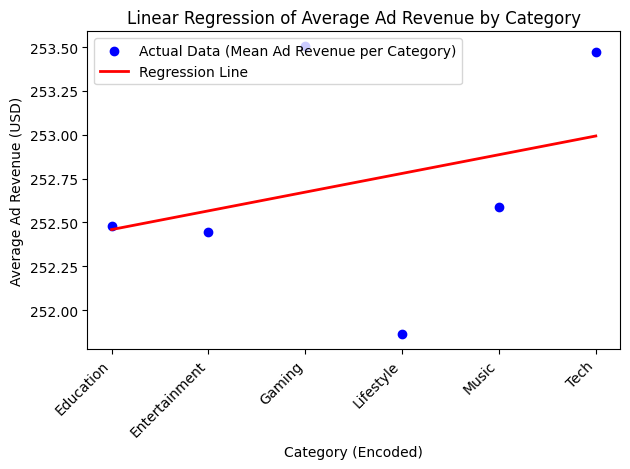

In [ ]:
# Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd # Import pandas for data manipulation

# 1. Prepare Data
# Group by category and calculate the mean ad_revenue_usd for each category
category_ad_revenue = df.groupby('category')['ad_revenue_usd'].mean().reset_index()

# Sort by category name for consistent encoding and plotting
category_ad_revenue = category_ad_revenue.sort_values(by='category')

# Independent variable X (category_encoded), Dependent variable y (mean_ad_revenue_usd)
# Encode categories into numerical values
X = pd.factorize(category_ad_revenue['category'])[0].reshape(-1, 1)
y = category_ad_revenue['ad_revenue_usd'].values

# 2. Initialize and Train Model
model = LinearRegression()
model.fit(X, y)

# 3. Make Predictions
y_pred = model.predict(X)

# 4. Evaluate Model Performance
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y, y_pred):.2f}")

# 5. Visualize Results
plt.scatter(X, y, color='blue', label='Actual Data (Mean Ad Revenue per Category)')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Category (Encoded)')
plt.ylabel('Average Ad Revenue (USD)')
plt.title('Linear Regression of Average Ad Revenue by Category')
# Set x-axis ticks to display original category names
plt.xticks(X.flatten(), category_ad_revenue['category'], rotation=45, ha='right')
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Exploratory data analysis (EDA)
# To find out correlation for numerical columns
df.select_dtypes(include=np.number).corr()

,video_length_minutes,subscribers,ad_revenue_usd
video_length_minutes,1.000000,0.002578,-0.000446
subscribers,0.002578,1.000000,0.005907
ad_revenue_usd,-0.000446,0.005907,1.000000


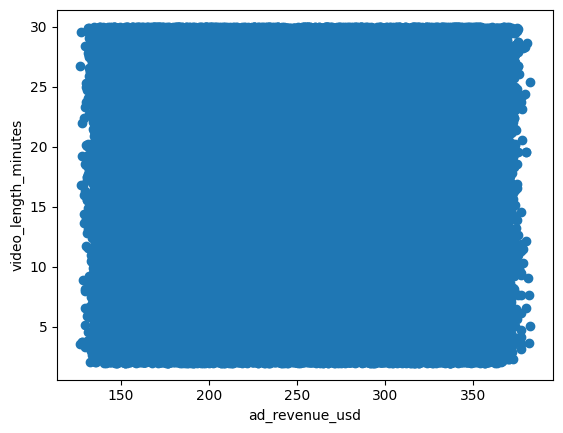

In [ ]:
# Data visualization
plt.scatter(df['ad_revenue_usd'],df['video_length_minutes'])
plt.xlabel('ad_revenue_usd')
plt.ylabel('video_length_minutes')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Training and Testing data split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# checking the split
x_train.shape, x_test.shape, y_train.shape, y_test.shape
from sklearn.preprocessing import StandardScaler

# scaling of the data
scalar = StandardScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test) # Scale x_test and assign to X_test
X_train

array([[ 1.34164079],
       [-1.34164079],
       [ 0.4472136 ],
       [-0.4472136 ]])

In [ ]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(model.coef_)

[ 6.59967575e-03  1.70815487e-02  1.68066925e-02  4.71473683e-03
  3.05868506e-03  9.11337578e-08 -2.28004621e-02 -1.01106785e-01
  1.79557392e-02 -9.24142739e-02  5.31695995e-02 -6.31980314e-02
 -2.34838669e-01 -8.70854072e-02 -3.09193541e-02 -1.31626648e-01
  3.81341834e-02 -7.46080936e-02 -9.26187273e-02]


In [ ]:
print(model.intercept_)

-13.613197972967896


In [ ]:
# Testing of the dataset
y_prediction = model.predict(X_test)
y_actual = y_test

In [ ]:
# Model evaluation
import pandas as pd # Ensure pandas is available
import numpy as np # Ensure numpy is available
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_actual, y_prediction)
r2 = r2_score(y_actual, y_prediction)
rmse =  root_mean_squared_error(y_actual, y_prediction)
print(mae)
print(r2)
print(rmse)

3.107136984954907
0.9525761450640905
13.479737603222386


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

def train_youtube_model(path):
    # 1. Load and basic cleaning
    df = pd.read_csv(path)
    cols_to_check_for_F = [] # As of the current dataset, these columns are already numeric.
    for col in cols_to_check_for_F:
        if col in df.columns:
            df = df[df[col] != 'F']
            df[col] = pd.to_numeric(df[col])

    # Drop rows with any NaN values in the entire DataFrame
    df.dropna(inplace=True)

    # 3. Encode Category
    le = LabelEncoder()
    df['category_enc'] = le.fit_transform(df['category'])

    # 4. Train Model
    features = ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category_enc']
    X = df[features]
    y = df['ad_revenue_usd'] # Correct target column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(X_train, y_train)
    print(f"Model Score (R2): {model.score(X_test, y_test):.4f}")

    # 5. Sample Prediction
    sample = np.array([[10000, 500, 20, 300, 10, 100000, 1]])
    prediction = model.predict(sample)[0]
    print(f"Predicted Revenue: ${max(0, prediction):,.2f}")

# Run with your path
file_path = '/content/youtube_ad_revenue_dataset.csv'
train_youtube_model(file_path)

Model Score (R2): 1.0000
Predicted Revenue: $62.46


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
